In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [20]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [21]:
data = pd.read_csv('pop.csv')
data


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [22]:
country_code={data['Country Name'][i].lower():i for i in range(266)}
country_code

{'aruba': 0,
 'africa eastern and southern': 1,
 'afghanistan': 2,
 'africa western and central': 3,
 'angola': 4,
 'albania': 5,
 'andorra': 6,
 'arab world': 7,
 'united arab emirates': 8,
 'argentina': 9,
 'armenia': 10,
 'american samoa': 11,
 'antigua and barbuda': 12,
 'australia': 13,
 'austria': 14,
 'azerbaijan': 15,
 'burundi': 16,
 'belgium': 17,
 'benin': 18,
 'burkina faso': 19,
 'bangladesh': 20,
 'bulgaria': 21,
 'bahrain': 22,
 'bahamas, the': 23,
 'bosnia and herzegovina': 24,
 'belarus': 25,
 'belize': 26,
 'bermuda': 27,
 'bolivia': 28,
 'brazil': 29,
 'barbados': 30,
 'brunei darussalam': 31,
 'bhutan': 32,
 'botswana': 33,
 'central african republic': 34,
 'canada': 35,
 'central europe and the baltics': 36,
 'switzerland': 37,
 'channel islands': 38,
 'chile': 39,
 'china': 40,
 "cote d'ivoire": 41,
 'cameroon': 42,
 'congo, dem. rep.': 43,
 'congo, rep.': 44,
 'colombia': 45,
 'comoros': 46,
 'cabo verde': 47,
 'costa rica': 48,
 'caribbean small states': 49,
 'c

In [23]:
data.drop(['Country Code','Indicator Name','Indicator Code'], inplace=True, axis=1)
data

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,59471.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,162875171.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,10247780.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,115921723.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,5868203.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0
262,"Yemen, Rep.",5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0
263,South Africa,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0
264,Zambia,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0


In [24]:
df_new = pd.DataFrame({
    'year': data.columns[1:],
    'population': data.iloc[country_code['Zambia'.lower()]].values[1:] 
})
df_new

,year,population
0,1960,3119430.0
1,1961,3219451.0
2,1962,3323427.0
3,1963,3431381.0
4,1964,3542764.0
...,...,...
58,2018,17835893.0
59,2019,18380477.0
60,2020,18927715.0
61,2021,19473125.0


In [25]:
lstm_data=df_new.groupby(['year']).agg({'population':'sum'})
lstm_data

,population
year,
1960,3119430.0
1961,3219451.0
1962,3323427.0
1963,3431381.0
1964,3542764.0
...,...
2018,17835893.0
2019,18380477.0
2020,18927715.0


In [26]:
lstm_data.isnull().sum()

population    0
dtype: int64

In [27]:
lstm_data.shape

(63, 1)

In [28]:
training_set=lstm_data.iloc[:,0:1].values
np.transpose(training_set)

array([[3119430.0, 3219451.0, 3323427.0, 3431381.0, 3542764.0, 3658024.0,
        3777680.0, 3901288.0, 4029173.0, 4159007.0, 4281671.0, 4399919.0,
        4523581.0, 4653289.0, 4789038.0, 4931249.0, 5079672.0, 5233292.0,
        5391355.0, 5553462.0, 5720438.0, 5897481.0, 6090818.0, 6291070.0,
        6488072.0, 6686449.0, 6890967.0, 7095185.0, 7294325.0, 7491275.0,
        7686401.0, 7880466.0, 8074337.0, 8270917.0, 8474216.0, 8684135.0,
        8902019.0, 9133156.0, 9372430.0, 9621238.0, 9891136.0,
        10191964.0, 10508294.0, 10837973.0, 11188040.0, 11564870.0,
        11971567.0, 12402073.0, 12852966.0, 13318087.0, 13792086.0,
        14265814.0, 14744658.0, 15234976.0, 15737793.0, 16248230.0,
        16767761.0, 17298054.0, 17835893.0, 18380477.0, 18927715.0,
        19473125.0, 20017675.0]], dtype=object)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data1 = scaler.fit_transform(training_set)
data1.shape

minm=float(min(training_set))
maxm=float(max(training_set))


In [30]:
training_size = int(len(data1) * 0.80)
test_size = len(data1) - training_size
train_data , test_data = data1[0:training_size , :] , data1[training_size : len(data1) ,:1]
test_data.shape

(13, 1)

In [31]:
def create_dataset(dataset , time_step ):
    data_x , data_y = [] , []
    for i in range(len(dataset) - time_step ):
        data_x.append(dataset[i : (i + time_step) , 0])
        data_y.append(dataset[(i + time_step) , 0])
    return np.array(data_x) , np.array(data_y)

In [32]:
time_step = 10
x_train , y_train = create_dataset(train_data , time_step)
y_train

array([0.0687788 , 0.07577645, 0.08309449, 0.09077031, 0.09880363,
       0.10721936, 0.1160027 , 0.12509358, 0.13444739, 0.14404052,
       0.15392178, 0.16439879, 0.17584004, 0.1876905 , 0.19934863,
       0.21108813, 0.22319105, 0.23527621, 0.24706086, 0.25871592,
       0.27026304, 0.28174736, 0.29322021, 0.30485337, 0.31688415,
       0.32930668, 0.34220057, 0.35587873, 0.37003843, 0.38476232,
       0.40073428, 0.4185366 , 0.43725629, 0.45676595, 0.47748213,
       0.49978208, 0.52384949, 0.54932586, 0.57600869, 0.6035335 ])

In [33]:
x_test , y_test = create_dataset(test_data , time_step)
y_test

array([0.93549863, 0.96777476, 1.        ])

In [34]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape,x_test.shape

((40, 10, 1), (3, 10))

In [35]:
print(x_train)

[[[0.        ]
  [0.00591902]
  [0.01207208]
  [0.01846056]
  [0.02505195]
  [0.03187278]
  [0.03895375]
  [0.04626859]
  [0.05383654]
  [0.06151982]]

 [[0.00591902]
  [0.01207208]
  [0.01846056]
  [0.02505195]
  [0.03187278]
  [0.03895375]
  [0.04626859]
  [0.05383654]
  [0.06151982]
  [0.0687788 ]]

 [[0.01207208]
  [0.01846056]
  [0.02505195]
  [0.03187278]
  [0.03895375]
  [0.04626859]
  [0.05383654]
  [0.06151982]
  [0.0687788 ]
  [0.07577645]]

 [[0.01846056]
  [0.02505195]
  [0.03187278]
  [0.03895375]
  [0.04626859]
  [0.05383654]
  [0.06151982]
  [0.0687788 ]
  [0.07577645]
  [0.08309449]]

 [[0.02505195]
  [0.03187278]
  [0.03895375]
  [0.04626859]
  [0.05383654]
  [0.06151982]
  [0.0687788 ]
  [0.07577645]
  [0.08309449]
  [0.09077031]]

 [[0.03187278]
  [0.03895375]
  [0.04626859]
  [0.05383654]
  [0.06151982]
  [0.0687788 ]
  [0.07577645]
  [0.08309449]
  [0.09077031]
  [0.09880363]]

 [[0.03895375]
  [0.04626859]
  [0.05383654]
  [0.06151982]
  [0.0687788 ]
  [0.07577645

In [36]:
#### Reshape input to be 3D [ samples , time steps , features] which is required for LSTM....
x_train = np.reshape(x_train,(x_train.shape[0] , x_train.shape[1],1))
x_test = np.reshape(x_test,(x_test.shape[0] , x_test.shape[1]))

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM , Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.initializers import GlorotUniform

In [38]:
model = Sequential()
model.add(LSTM(10, return_sequences = True, input_shape = (10,1),recurrent_initializer=GlorotUniform(seed=2)))
model.add(Dropout(0.2))

model.add(LSTM(15,recurrent_initializer=GlorotUniform(seed=2)))
model.add(Dropout(0.2))
model.add(Dense(1))

In [39]:
model.compile(loss="mean_squared_error" , optimizer = 'adam')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            480       
                                                                 
 dropout (Dropout)           (None, 10, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 15)                1560      
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 2,056
Trainable params: 2,056
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 80, batch_size = 25,shuffle=False, verbose =1)

Epoch 1/80
2/2 [==============================] - 22s 5s/step - loss: 0.0767 - val_loss: 0.7270
Epoch 2/80
2/2 [==============================] - 0s 108ms/step - loss: 0.0725 - val_loss: 0.6624
Epoch 3/80
2/2 [==============================] - 0s 106ms/step - loss: 0.0618 - val_loss: 0.5991
Epoch 4/80
2/2 [==============================] - 0s 108ms/step - loss: 0.0500 - val_loss: 0.5380
Epoch 5/80
2/2 [==============================] - 0s 115ms/step - loss: 0.0435 - val_loss: 0.4793
Epoch 6/80
2/2 [==============================] - 0s 110ms/step - loss: 0.0315 - val_loss: 0.4233
Epoch 7/80
2/2 [==============================] - 0s 105ms/step - loss: 0.0257 - val_loss: 0.3702
Epoch 8/80
2/2 [==============================] - 0s 115ms/step - loss: 0.0248 - val_loss: 0.3205
Epoch 9/80
2/2 [==============================] - 0s 111ms/step - loss: 0.0176 - val_loss: 0.2744
Epoch 10/80
2/2 [==============================] - 0s 117ms/step - loss: 0.0143 - val_loss: 0.2330
Epoch 11/80
2/2 [====

In [42]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

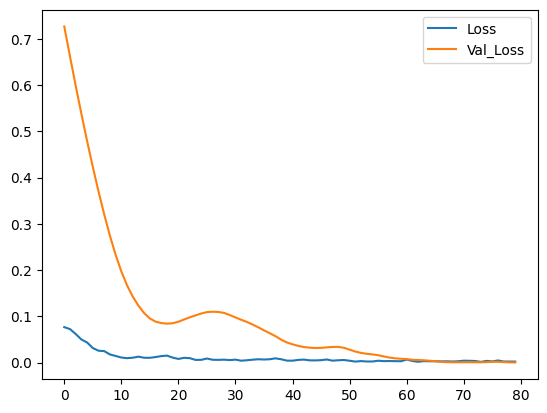

In [43]:
### Plot loss and val-loss.....
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend()
plt.show()

In [44]:
x_test2=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [45]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test2)


1/1 [==============================] - 0s 92ms/step


In [46]:
test_pred

array([[0.9184219 ],
       [0.9522288 ],
       [0.98595464]], dtype=float32)

In [47]:
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1))

In [48]:
test_pred_original_scale = scaler.inverse_transform(test_pred.reshape(-1, 1))

In [49]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original_scale, test_pred_original_scale)
print("The R-squared of the Testing model is: %.2f" % r2)

The R-squared of the Testing model is: 0.65


In [50]:
look_back = 10
trainPredictPlot = np.empty_like(data1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred) + look_back, :] = train_pred

In [51]:
testPredictPlot = np.empty_like(data1)
testPredictPlot[: , :] = np.nan
testPredictPlot[len(train_pred) + (look_back * 2) :len(data1), :] = test_pred

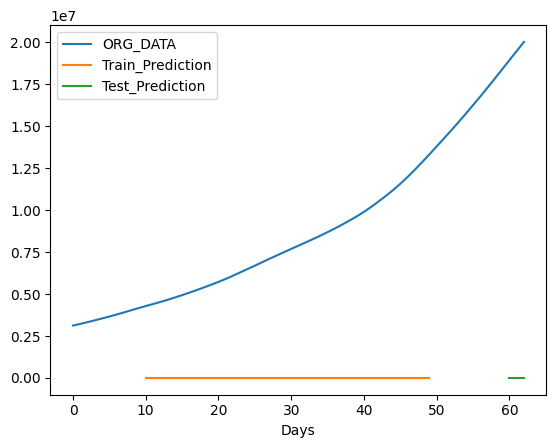

In [52]:
plt.plot(scaler.inverse_transform(data1),label='ORG_DATA')
plt.plot(trainPredictPlot,label='Train_Prediction')
plt.plot(testPredictPlot,label='Test_Prediction')
plt.legend()
plt.xlabel('Days')
plt.show()

# Predict the future 20 years

In [53]:
len(test_data)

13

In [54]:
new_x_input = test_data[3:].reshape(1,-1)

In [55]:
new_x_input.shape

(1, 10)

In [56]:
temp_input = list(new_x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.7169706676640089,
 0.7467262428731505,
 0.7769327524840597,
 0.8076774244899396,
 0.8390589673661377,
 0.8708870654911205,
 0.9031143174927336,
 0.9354986272243064,
 0.9677747600416493,
 1.0]

In [57]:
len(temp_input)

10

In [58]:
#### Logic for Prediction for next 30 days......
new_output = []
steps = 10
i = 0
while(i<20):
    if(len(temp_input) > 10):
        new_x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, new_x_input))
        new_x_input = new_x_input.reshape(1,-1)
        new_x_input = new_x_input.reshape((1, steps, 1))
        ypred = model.predict(new_x_input, verbose = 0)
        print("{} day output {}".format(i, ypred))
        temp_input.extend(ypred[0].tolist())
        temp_input = temp_input[1:]
        new_output.extend(ypred.tolist())
        i = i + 1
    else:
        new_x_input = new_x_input.reshape((1, steps, 1))
        ypred = model.predict(new_x_input, verbose = 0)
        print(ypred[0])
        temp_input.extend(ypred[0].tolist())
        new_output.extend(ypred.tolist())
        i = i + 1

[1.019502]
1 day input [0.74672624 0.77693275 0.80767742 0.83905897 0.87088707 0.90311432
 0.93549863 0.96777476 1.         1.01950204]
1 day output [[1.0521817]]
2 day input [0.77693275 0.80767742 0.83905897 0.87088707 0.90311432 0.93549863
 0.96777476 1.         1.01950204 1.05218172]
2 day output [[1.0841107]]
3 day input [0.80767742 0.83905897 0.87088707 0.90311432 0.93549863 0.96777476
 1.         1.01950204 1.05218172 1.08411074]
3 day output [[1.1152594]]
4 day input [0.83905897 0.87088707 0.90311432 0.93549863 0.96777476 1.
 1.01950204 1.05218172 1.08411074 1.11525941]
4 day output [[1.1455774]]
5 day input [0.87088707 0.90311432 0.93549863 0.96777476 1.         1.01950204
 1.05218172 1.08411074 1.11525941 1.14557743]
5 day output [[1.174999]]
6 day input [0.90311432 0.93549863 0.96777476 1.         1.01950204 1.05218172
 1.08411074 1.11525941 1.14557743 1.174999  ]
6 day output [[1.2034643]]
7 day input [0.93549863 0.96777476 1.         1.01950204 1.05218172 1.08411074
 1.1152

In [59]:
new_output

[[1.01950204372406],
 [1.0521817207336426],
 [1.0841107368469238],
 [1.1152594089508057],
 [1.1455774307250977],
 [1.1749989986419678],
 [1.2034642696380615],
 [1.2309070825576782],
 [1.2572734355926514],
 [1.2825268507003784],
 [1.3066264390945435],
 [1.3305319547653198],
 [1.353044867515564],
 [1.374207854270935],
 [1.3940593004226685],
 [1.4126381874084473],
 [1.42998468875885],
 [1.446142315864563],
 [1.4611566066741943],
 [1.4750767946243286]]

In [60]:
new_day = np.arange(1,21)
pred_day = np.arange(21,41)

In [61]:
len(data1)

63

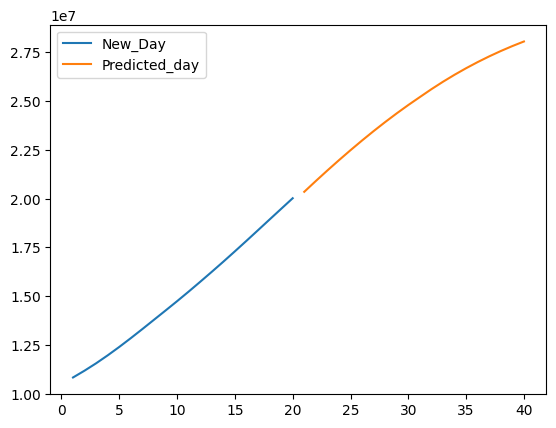

In [62]:
plt.plot(new_day, scaler.inverse_transform(data1[43:]),label='New_Day')
plt.plot(pred_day, scaler.inverse_transform(new_output),label='Predicted_day')
plt.legend()
plt.show()

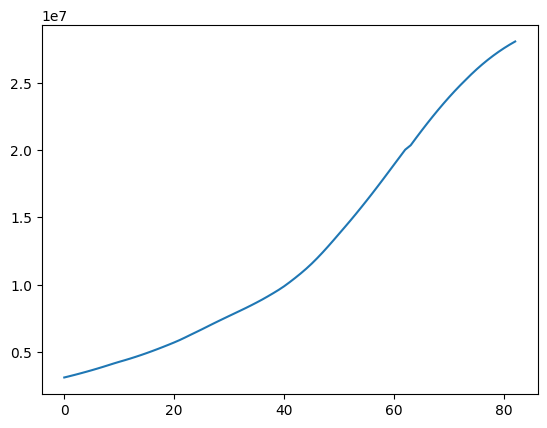

In [63]:
data2 = data1.tolist()
data2.extend(new_output)
plt.plot(scaler.inverse_transform(data2))

In [64]:
new_Output = scaler.inverse_transform(new_output)
new_Output

array([[20347225.31284988],
       [20899454.50147867],
       [21438998.83836985],
       [21965356.73100591],
       [22477678.09086323],
       [22974850.95380664],
       [23455864.07709002],
       [23919599.45329487],
       [24365144.54663634],
       [24791882.94221342],
       [25199123.69129717],
       [25603084.95195329],
       [25983513.66727054],
       [26341131.00239456],
       [26676585.60307086],
       [26990536.18718386],
       [27283661.61689579],
       [27556697.15834677],
       [27810412.32294917],
       [28045639.06937659]])